# Chapter 3   算法分析

---

## 绘制 7 种常用函数

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


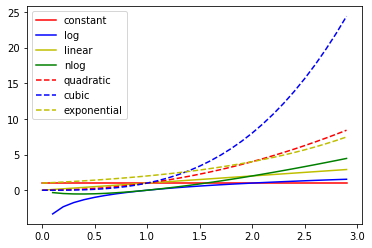

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(0, 3, 0.1)
y_constant = [1 for _ in x]
y_log = np.log2(x)
y_linear = x
y_nlog = x * np.log2(x)
y_quadratic = x * x
y_cubic = x ** 3
y_exponential = 2 ** x

#plt.ylim(0, 10**10)

plt.plot(x, y_constant, color = 'r', label = 'constant')
plt.plot(x, y_log, color = 'b', label = 'log')
plt.plot(x, y_linear, color = 'y', label = 'linear')
plt.plot(x, y_nlog, color = 'g', label = 'nlog')
plt.plot(x, y_quadratic, '--', color = 'r', label = 'quadratic')
plt.plot(x, y_cubic, '--', color = 'b', label = 'cubic')
plt.plot(x, y_exponential, '--', color = 'y', label = 'exponential')

plt.legend(loc = 'best')

plt.show()

## 计算前缀平均值

给出一个包含 n 个数的序列 S ，我们想计算出序列 A，满足当 j=0,...,n 时，A[j] 是 S[0],...,S[j]的平均值，即：

$$ A[j] = \frac{\sum^{j}_{i = 0}{S[j]}}{j+1} $$

### Code 3-2  二次-时间算法 prefix_average1

In [4]:
def prefix_average1(S):
    """ Return list such that, for all j, A[j] equals average of S[0],...,S[j]"""
    n = len(S)
    A = [0] * n                # create new list of n zeros
    for j in range(n):
        total = 0
        for i in range(j +1):
            total += S[i]
        A[j] = total /(j+1)
    return A

有两层嵌套循环

运行时间：$O(n^2)$

### Code 3-3 prefix_average2

In [5]:
def prefix_average2(S):
    """ Return list such that, for all j, A[j] equals averages of S[0],...,S[j]"""
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j+1]) / (j+1)
    return A

虽然只有一层循环，但实际上，循环内的 sum 调用了求和函数，并且这个函数的运行时间很明显是 $O(j+1)$ 

因此，该算法运行时间亦是：$O(n^2)$

### Code 3-4 线性时间算法 prefix_average3

In [6]:
def prefix_average3(S):
    """ Return list such that, for all j, A[j] equals average of S[0],...,S[j]"""
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]               # update prefix sum to include S[j]
        A[j] = total / (j+1)        # compute averhae based on current sum
    return A

前两个算法每次计算平均值前， 都对 S[0]-S[j] 的和进行了重新计算，而这个算法中，采用了动态规划的概念，每次都会存储和值，下次计算时，直接将上一次循环的存储和值加上新的 S[j] 即可

因而，运行时间为：$O(n)$

## 三集不相交

### Code 3-5 disjoint1 测试三集不相交

In [7]:
def disjoint1(A, B, C):
    """ Return True if there is no element common to all three lists."""
    for a in A:
        for b in B:
            for c in C:
                if a == b == c:
                    return False
    return True

运行时间：$O(n^3)$

### Code 3-6 disjoint2 测试三集不相交

In [8]:
def disjoint2(A, B, C):
    """REturn True if there is no element common to all three lists."""
    for a in A:                          # O(n)
        for b in B:                      # O(n^2)
            if a == b:                   # O(n^2)，但是，由于 A 和 B 序列内没有重复值，因此，符合 a==b 条件的(a, b)值最多只有 n 个
                for c in C:              # O(n^2)
                    if a == c:           # O(n^2)
                        return False     # O(1)
    return True                          # O(1)

运行时间：$O(n^2)$

## 元素唯一性

### Code 3-7 unique1

In [9]:
def unique1(S):
    """Return  True if there are no duplicate element in sequence s."""
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

运行时间：$O(n^2)$

### Code 3-8 以排序作为解决问题的工具 unique2

In [10]:
def unique2(S):
    """ Return True fi there are no duplicate element in sequence S."""
    temp = sorted(S)
    for j in range(1, len(temp)):
        if temp[j-1] == temp[j]:
            return False
    return True

基于 Python 内置函数：sort 运行时间为：$O(n \cdot logn)$

因此，该算法的运行时间为：$O(n \cdot logn)$